# Интерполација

Садржај:
1. [Интерполациони полином у стандардном облику](#Интерполациони-полином-у-стандардном-облику)
1. [Лагранжова интерполација](#Лагранжова-интерполација)
1. [Невилов алгоритам](#Невилов-алгоритам)

## Интерполациони полином у стандардном облику

Нека је дат скуп података о функцији
$$S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j, \ i\neq j\big\}.$$

<div class="alert alert-block alert-warning">
<b>Интерполациони проблем:</b> 
    
   Одредити јединствен полином $P_n(x)$ најнижег степена чији график пролази кроз све тачке скупа података $S.$
</div>

Интерполациони услови тада гласе:
$$P_n(x_0)=f(x_0)=f_0,\quad P_n(x_1)=f(x_1)=f_1,\quad\dots\quad P_n(x_n)=f(x_n)=f_n.$$ 

Постављени интерполациони проблем можемо да решимо посматрањем интерполационог полинома у стандардном облику,
$$P_n(x)=p_0x^n+p_1x^{n-1}+\dots+p_{n-1}x+p_n.$$
Интерполациони услови постају систем линеарних једначина по непознатим коефицијентима полинома $P_n(x).$
$$AP=b,\qquad A=\begin{bmatrix} x_0^n&x_0^{n-1}&\dots&x_0&1\\
x_1^n&x_1^{n-1}&\dots&x_1&1\\
\vdots&\vdots&&\vdots&\vdots\\
x_n^n&x_n^{n-1}&\dots&x_n&1\end{bmatrix},\quad 
P=\begin{bmatrix} p_0\\ p_1\\ \vdots\\ p_n\end{bmatrix},\quad 
b=\begin{bmatrix} f_0\\f_1\\ \vdots\\f_n\end{bmatrix}.$$
Решење система линеарних једначина можемо да добијемо позивом наредбе `linalg.solve(A,b)`.

**Пример 1.**   За функцију $f(x)=\dfrac{\cos(x/\pi)- x + 2 x^2 + 1}{\log(x^2+1)}$ креиран је скуп узорака у $6$ еквидистантних чворова распоређених на интервалу $[-1.8,3.5].$ Одредићемо интерполациони полином који пролази кроз исте ове тачке узорка.

In [1]:
import numpy as np
import matplotlib as mplb
import matplotlib.pyplot as plt

In [2]:
xk=np.linspace(0.3,3,6)
fk=(np.cos(xk/np.pi)-xk+2*xk**2+1)/(np.log(1+xk**2))

Креирамо матрицу система $A,$ и потражимо коефицијенте интерполационог полинома као решење система $AP=b,$ где је $P$ вектор непознатих коефицијената.

In [3]:
A=np.vander(xk)
P=np.linalg.solve(A,fk)

In [4]:
P

array([  -2.44031752,   23.76460106,  -89.54673714,  163.56946712,
       -143.84137442,   52.42488089])

Проверићемо кроз графике добијени резултат.

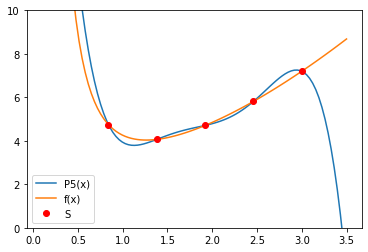

In [5]:
x=np.linspace(0.1,3.5,100)
ip=np.polyval(P,x)
f=(np.cos(x/np.pi)-x+2*x**2+1)/(np.log(1+x**2))

plt.plot(x,ip,label="P5(x)")
plt.plot(x,f,label="f(x)")
plt.plot(xk,fk,'ro',label="S")
plt.ylim([0,10])
plt.legend();

## Лагранжова интерполација

За скуп података 
$$S=\big\{\big(x_k,f(x_k)\big)\ |\ k=0,1,\dots,n,\ x_i\neq x_j, \ i\neq j\big\}$$
полиноми Лагранжове базе гласе:
$$w_j(x)=\prod_{i\neq j}(x-x_i),\qquad L_j(x)=\dfrac{w_j(x)}{w_j(x_j)}\,.$$

**Пример 2.** За серију функција узоркованих над чворовима $x_k$ креираћемо интерполационе полиноме користећи Лагранжов базис. Коефицијенте базних полинома сместићемо унутар врста матрице $L.$

Функције за интерполацију су:
\begin{align}
&f_1(x)=\sin(6x)+\sin(60e^x), &&f_2(x)=\dfrac{1}{1+10(x+1.5)^2} + \dfrac{1}{\sqrt{1+10(x-0.5)^2}},\\
&f_3(x)= (3+\sin(\pi x)+\sin(e^{0.8\sin(\pi x)+0.7}))e^{\pi x/10}, && f_4(x)=\dfrac{1-2x^2}{\cos(e^{2x})+2}
\end{align}

Чворови су: $x_k\in\{-0.66,-0.54,-0.47,-0.33,-0.21,-0.12,0.03,0.11,0.26,0.37,0.41,0.81\}.$

In [6]:
xk=np.array([-0.66,-0.54,-0.47,-0.33,-0.21,-0.12,0.03,0.11,0.26,0.37,0.41,0.81])
n=xk.size
L=np.zeros([n,n]) 
for i in range(n):
    w=np.polymul(np.poly(xk[:i]),np.poly(xk[i+1:]))
    alfa=np.polyval(w,xk[i])
    L[i]=w/alfa    

Можемо да погледамо графике ових базних функција како бисмо се уверили да заиста имају својства $L_j(x_i)=\begin{cases}
1,&i=j,\\0,&i\neq j. \end{cases}$

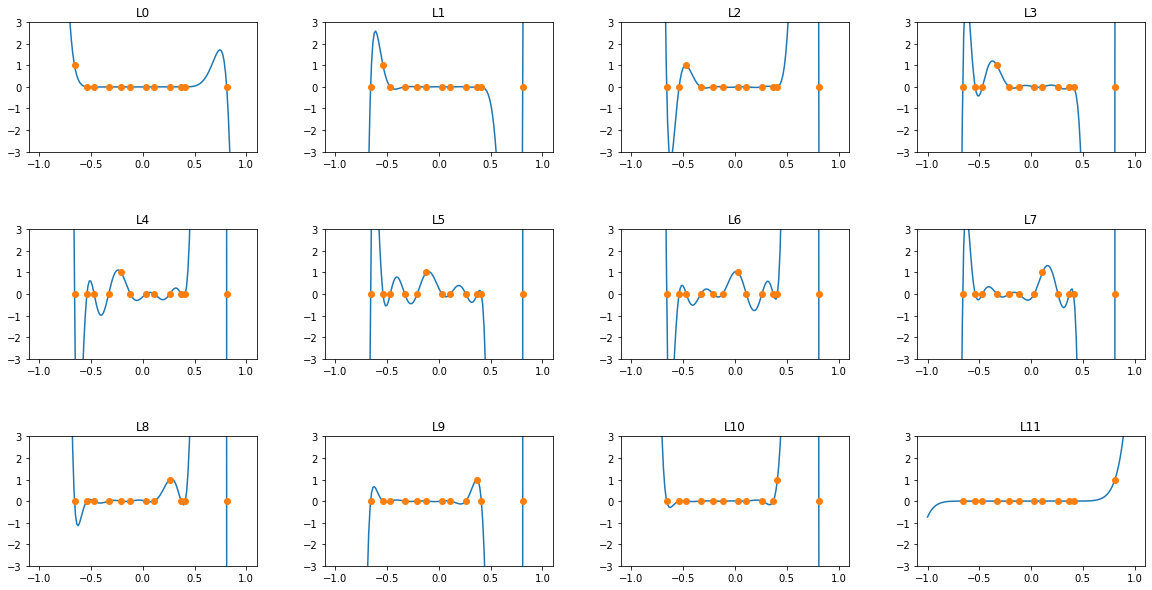

In [7]:
x=np.linspace(-1,1,150)
slika = plt.figure(figsize=(20,10)) 
slika.subplots_adjust(hspace=0.6, wspace = 0.3)
I=np.eye(n)

for i in range(12):
    Li=np.polyval(L[i],x)
    plt.subplot(3,4,i+1)
    plt.plot(x,Li)
    plt.plot(xk,I[i],'o')
    plt.ylim([-3,3])
    plt.title("L"+str(i))

Креираћемо сада узорке функција које желимо да интерполирамо у наведеним чворовима. Вредности функција $f_i(x_k)$ биће смештене дуж врста матрице $Fk.$

In [8]:
#uzorkovanje funkcija f1,f2,f3 i f4    
Fk=np.empty([4,n])
Fk[0]=np.sin(6*xk)+np.sin(60*np.exp(xk)) 
Fk[1]=1/(1+10*(xk+1.5)**2)+np.sqrt(1+10*(xk-0.5)**2)
Fk[2]=(3+np.sin(np.pi*xk)+np.sin(np.exp(0.8*np.sin(np.pi*xk)+0.7)))*np.exp(np.pi*xk/10)
Fk[3]=(1-2*xk**2)/(np.cos(np.exp(2*xk))+2)

Сада можемо да формирамо интерполационе полиноме, тј. векторе њихових коефицијената, као линеарне комбинације базних функција
$$P_k(x)=f_0L_0(x)+f_1L_1(x)+\dots+f_{11}L_{11}(x).$$
Коефицијенти интерполационих полинома $P_k(x)$ смештени су у врстама матрице $P.$

In [9]:
#formiranje matrice koeficijenata interpolacionih polinoma
P=Fk@L  
#svaka vrsta matrice P sadrži koeficijente jednog interpolacionog polinoma  

Добијене резултате најбоље оцењујемо графички.

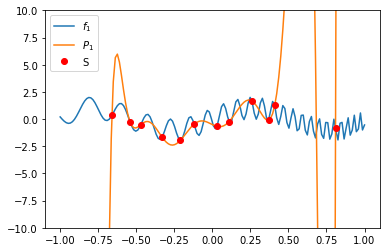

In [10]:
f1=np.sin(6*x)+np.sin(60*np.exp(x))
P1=np.polyval(P[0],x)
plt.plot(x,f1,label=r'$f_1$')
plt.plot(x,P1,label=r'$P_1$')
plt.plot(xk,Fk[0],'ro',label="S")
plt.ylim([-10,10])
plt.legend();

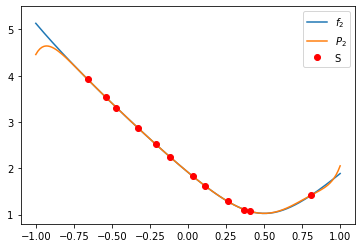

In [11]:
f2=1/(1+10*(x+1.5)**2)+np.sqrt(1+10*(x-0.5)**2)
P2=np.polyval(P[1],x)
plt.plot(x,f2,label=r'$f_2$')
plt.plot(x,P2,label=r'$P_2$')
plt.plot(xk,Fk[1],'ro',label="S")
plt.ylim([0.8,5.5])
plt.legend();

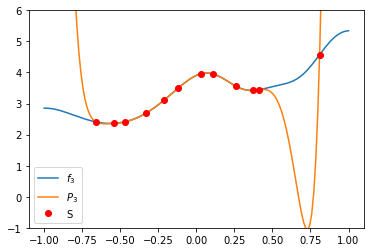

In [12]:
f3=(3+np.sin(np.pi*x)+np.sin(np.exp(0.8*np.sin(np.pi*x)+0.7)))*np.exp(np.pi*x/10)
P3=np.polyval(P[2],x)
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,P3,label=r'$P_3$')
plt.plot(xk,Fk[2],'ro',label="S")
plt.ylim([-1,6])
plt.legend();

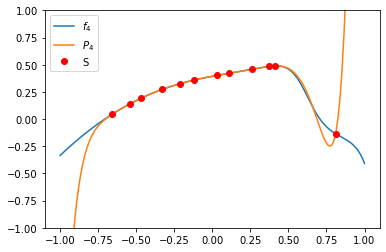

In [13]:
f4=(1-2*x**2)/(np.cos(np.exp(2*x))+2)
P4=np.polyval(P[3],x)
plt.plot(x,f4,label=r'$f_4$')
plt.plot(x,P4,label=r'$P_4$')
plt.plot(xk,Fk[3],'ro',label="S")
plt.ylim([-1,1])
plt.legend();

Идеја иза Лагранжове базе је веома корисна за формирање функција са задатим вредностима на неком скупу чворова и у општијој ситуацији.

**Пример 3** Претпоставимо да имамо две функције $g_1(x)$ и $g_2(x)$ које испуњавају жељене услове у неким тачкама:
$$g_1(x_1)=f_1,\qquad   g_2(x_2)=f_2.$$
Тада фукција коју зовемо Лагранжова комбинација
$$g(x)=\dfrac{x-x_2}{x_1-x_2}g_1(x)+\dfrac{x-x_1}{x_2-x_1}g_2(x)$$
испуњава услове $g(x_1)=f_1$ i $g(x_2)=f_2.$ Заиста,
\begin{align}
     g(x_1)&=\dfrac{x_1-x_2}{x_1-x_2}g_1(x_1)+\dfrac{x_1-x_1}{x_2-x_1}g_2(x_1)=g_1(x_1)=f_1 ,\\
     g(x_2)&=\dfrac{x_2-x_2}{x_1-x_2}g_1(x_2)+\dfrac{x_2-x_1}{x_2-x_1}g_2(x_2)=g_1(x_2)=f_2.
\end{align}
Приметимо да Уколико се у некој тачки $a\in\mathbb{R}$ функције $g_1$ и $g_2$ поклапају, тј. ако је  $g_1(a)=g_2(a)=b,$ тада је
\begin{align}
    g(a)&=\dfrac{a-x_2}{x_1-x_2}g_1(a)+\dfrac{a-x_1}{x_2-x_1}g_2(a)\\
    &=\dfrac{(a-x_2)-(a-x_1)}{x_1-x_2}b
    =\dfrac{x_1-x_2}{x_1-x_2}b=b.
\end{align}

На сличан начин функционише и алгоритам за израчунавање вредности интерполационог полинома $P_n(x)$ у некој тачки $x=a,$ а да том приликом сам израз за полином није познат. [Невилов алгоритам](https://en.wikipedia.org/wiki/Neville%27s_algorithm) је поступак којим се то извршава.

## Невилов алгоритам

Невилов алгоритам представља поступак израчунавања вредности интерполационог полинома $P_n(x)$ у некој тачки $x=a,$ а да том приликом није потребно познавање експлицитног облика самог полинома или његових коефицијената.


Претпоставимо да је потребно израчунати вредност интерполационог полинома $P_n(x)$ у тачки $x=a\not\in \{x_0,x_1,\dots,x_n\},$ на основу података о функцији $f$ у чворовима  $\{x_0,x_1,\dots,x_n\},$
$$S=\{(x_k,f_k),\ k=0,1,\dots,n\}.$$

Означимо са $p_{ij}(x),\ 0\leq i\leq j\leq n,$ полином који интерполира функцију $f$ на подскупу података 
$$S_{ij}=\{(x_k,f_k),\ k=i,i+1,\dots,j\}\subseteq S.$$ 
Приметимо да полином $p_{ij}(x)$ користи скуп од $j-i+1$ података, па је $p_{ij}(x)$ степена не већег од $j-i.$ На основу уведених ознака јасно је да је $P_n(x)=p_{0n}(x),$ тј. интерполациони полином на скупу $S$ је специјално интерполациони полином на скупу $S_{0n}\equiv S.$

С обѕиром да су полиноми $p_{ii}(x),\ 0\leq i\leq n,$ степена $i-i=0,$ тј. константни полиноми, то за њих важи 
$$p_{ii}(x)=f(x_i)=f_i,\quad 0\leq i\leq n.$$
Полиноми $p_{ij}(x)$ повезани су рекурентним релацијама које су кључ Невиловог алгоритма. Идеја је једноставна: 
       
> два суседна полинома  $p_{i\,j-1}(x)$ и $p_{i+1\,j}(x),$ истог степена $j-i-1,$ поклапају се на скупу података $S_{i\,j-1}\cap S_{i+1\,j}=S_{i+1\,j-1}\subset S_{ij},$ тј. поклапају се у чворовима $x_{i+1},x_{i+2},\dots,x_{j-1},$ 
$$p_{i\,j-1}(x_k)=f_k,\quad p_{i+1\,j}(x_k)=f_k,\qquad \forall i+1\leq k\leq j-1.$$
Осим тога, сваки од полинома $p_{i\,j-1}(x)$ и $p_{i+1\,j}(x)$ носи битне информације у још по једном чвору: $x_i\in S_{ij}$ и $x_j\in S_{ij}$ респективно,
$$p_{i\,j-1}(x_i)=f_i,\qquad p_{i+1\,j}(x_j)=f_j.$$
Лагранжовом комбинацијом ова два полинома можемо да креирамо нов полином степена $j-i$ који ће интерполирати скуп податка $S_{ij}.$ На основу особина Лагаранжове комбинације показаних у примеру 3 за полиноме $p_{ij}(x)$ заиста важе инетрполациони услови: $p_{ij}(x_k)=f_k,\ i\leq k\leq j.$

Због ове једноставне идеје, за $i<j$ важи једнакост 
\begin{align}   p_{ij}(x)&=\dfrac{(x-x_j)}{x_i-x_j}p_{i\,j-1}(x)+\dfrac{(x-x_i)}{x_j-x_i}p_{i+1\,j}(x)\\[8pt]     
&=\dfrac{(x-x_j)p_{i\,j-1}(x)-(x-x_i)p_{i+1\,j}(x)}{x_i-x_j}.
\end{align} 
Њом се генерише троугаони алгоритам израчунавања вредности полинома $P(a).$

На основу почетних вредности узорака функције
$$p_{ii}(a)=f(x_i)=f_i,\quad 0\leq i\leq n,$$
формира се троугаона шема са слике доле, на основу формула
$$p_{ij}(a)=\dfrac{(a-x_j)p_{i\,j-1}(a)-(a-x_i)p_{i+1\,j}(a)}{x_i-x_j}\,,\quad i<j.$$

<div>
   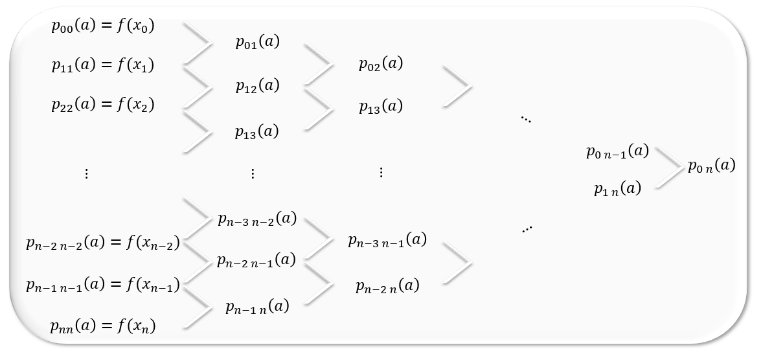  
</div>

Последња израчуната вредност $p_{0n}(a)$ је вредност интерполационог полинома у $x=a.$

**Пример 4.** Искористићемо податке за функцију $f_3(x)= (3+\sin(\pi x)+\sin(e^{0.8\sin(\pi x)+0.7}))e^{\pi x/10}$ из примера 2 за израчунавање вредности интерполационог полинома $P_3(x)$.

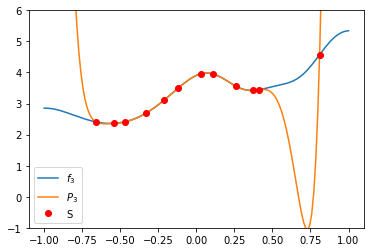

In [14]:
#podsetnik na interpolacioni polinom, funkciju i skup podatka
plt.plot(x,f3,label=r'$f_3$')
plt.plot(x,P3,label=r'$P_3$')
plt.plot(xk,Fk[2],'ro',label="S")
plt.ylim([-1,6])
plt.legend();

Имплементираћемо Невилов алгоритам за израчунавање вредности интерполационог полинома у тачкама $a\in\{-0.5,-0.1,0.2,0.6,0.9\},$ према формули
$$p_{ij}(a)=\dfrac{(a-x_j)p_{i\,j-1}(a)-(a-x_i)p_{i+1\,j}(a)}{x_i-x_j}\,,\quad i<j.$$
Користићемо један вектор `pii` за смештај свих међурезултата $p_{ij}(a).$ Коначна вредност биће први елемент вектора `pii`, тј. `pii[0]`. Како би имплементација шема одговарала употребљеним границама индекса приметимо да је укупан број чворова једнак $n+1,$ где је $n$ последњи индекс. Променљива `n=xk.size` је заправо величина $n+1$ са горњих шема. Због читљивости кода је прилагођавамо.

In [15]:
print(n)
n-=1
n

12


11

Шема алгоритма из корака у корак дата је на наредним сликама.

1. итерација
<div>
   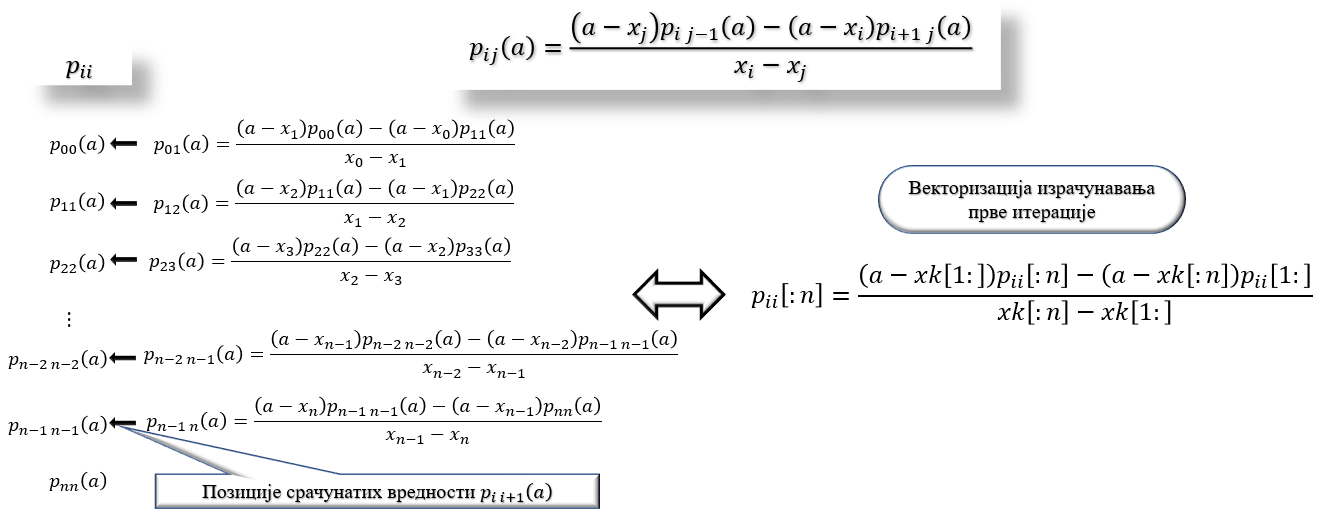  
</div>

2. итерација
<div>
   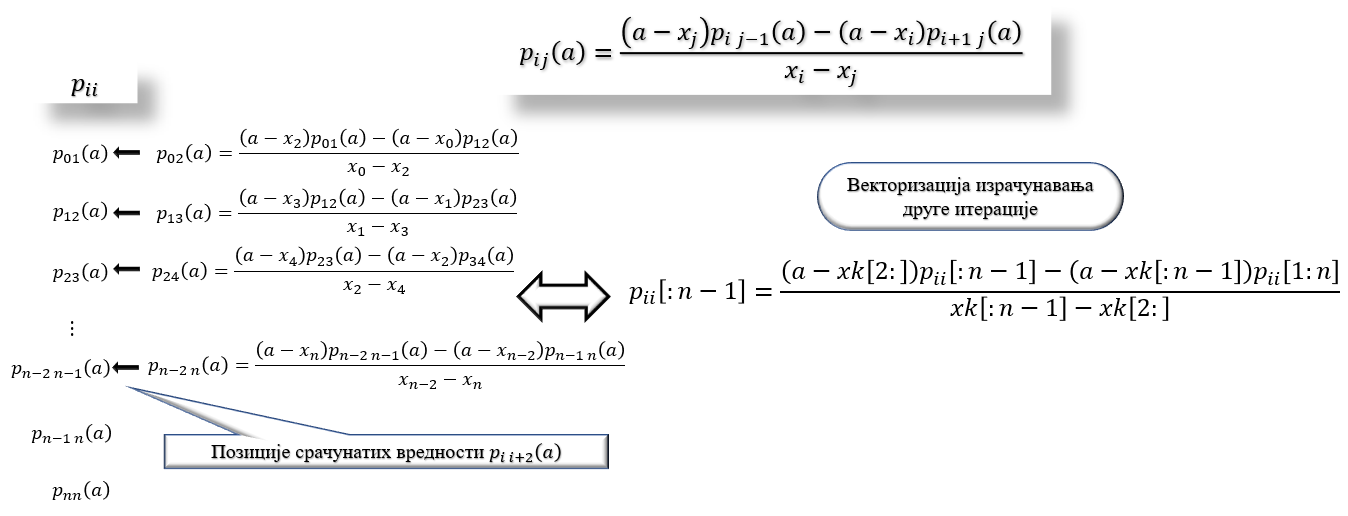  
</div>

Настављајући овакву анализу видимо да се следећи парови вредности $p_{ij}(a)$ увек налазе у суседним позицијама вектора `pii`.
На основу свега уочавамо правилност у формули за израчунавање уз векторизацију:
$$p_{ii}[:n-i]=\dfrac{(a-x_k[i+1:])p_{ii}[:n-i]-(a-x_k[:n-i])p_{ii}[1:n-i+1]}{x_k[:n-i]-x_k[i+1:]}.$$

In [16]:
pii=Fk[2].copy()
a=0.75
axk=a-xk;  #vektor razlika a-x_k
for i in range(n):
    pii[:n-i]=(axk[i+1:]*pii[:n-i]-axk[:n-i]*pii[1:n-i+1])/(xk[:n-i]-xk[i+1:])

Проверавамо добијени резултат графички.

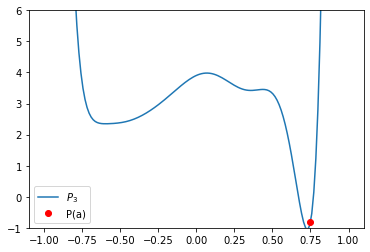

In [17]:
plt.plot(x,P3,label=r'$P_3$')
plt.plot(a,pii[0],'ro',label="P(a)")
plt.ylim([-1,6])
plt.legend();

Да би Невилов алгоритам радио за низ вредности смештених унутар вектора $a=\begin{bmatrix}a_0&a_1&\dots&a_m\end{bmatrix}^T$ претходни код треба прилагодити таквим улазним подацима. Другим речима, морамо да радимо са матрицом вектора $[p_{ii}(a_j)]\in\mathcal{M}_{(n+1)\times(m+1)}.$
Невилов алгоритам би кроз итерације требало да производи следеће матрице вредности:
\begin{align}
P_{ii}&=\begin{bmatrix}p_{00}(a_0)&p_{00}(a_1)&\dots&p_{00}(a_m)\\
p_{11}(a_0)&p_{11}(a_1)&\dots&p_{11}(a_m)\\
p_{22}(a_0)&p_{22}(a_1)&\dots&p_{22}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n-2}(a_0)&p_{n-2\,n-2}(a_1)&\dots&p_{n-2\,n-2}(a_m)\\
p_{n-1\,n-1}(a_0)&p_{n-1\,n-1}(a_1)&\dots&p_{n-1\,n-1}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}\mapsto
\begin{bmatrix}p_{01}(a_0)&p_{01}(a_1)&\dots&p_{01}(a_m)\\
p_{12}(a_0)&p_{12}(a_1)&\dots&p_{12}(a_m)\\
p_{23}(a_0)&p_{23}(a_1)&\dots&p_{23}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n-1}(a_0)&p_{n-2\,n-1}(a_1)&\dots&p_{n-2\,n-1}(a_m)\\
p_{n-1\,n}(a_0)&p_{n-1\,n}(a_1)&\dots&p_{n-1\,n}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}\\
&\mapsto
\begin{bmatrix}p_{02}(a_0)&p_{02}(a_1)&\dots&p_{02}(a_m)\\
p_{13}(a_0)&p_{13}(a_1)&\dots&p_{13}(a_m)\\
p_{24}(a_0)&p_{24}(a_1)&\dots&p_{24}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n}(a_0)&p_{n-2\,n}(a_1)&\dots&p_{n-2\,n}(a_m)\\
p_{n-1\,n}(a_0)&p_{n-1\,n}(a_1)&\dots&p_{n-1\,n}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}\mapsto\dots\mapsto\begin{bmatrix}
p_{0n}(a_0)&p_{0n}(a_1)&\dots&p_{0n}(a_m)\\
p_{1n}(a_0)&p_{1n}(a_1)&\dots&p_{1n}(a_m)\\
p_{2n}(a_0)&p_{2n}(a_1)&\dots&p_{2n}(a_m)\\
\vdots&\vdots&&\vdots\\
p_{n-2\,n}(a_0)&p_{n-2\,n}(a_1)&\dots&p_{n-2\,n}(a_m)\\
p_{n-1\,n}(a_0)&p_{n-1\,n}(a_1)&\dots&p_{n-1\,n}(a_m)\\
p_{nn}(a_0)&p_{nn}(a_1)&\dots&p_{nn}(a_m)
\end{bmatrix}.
\end{align}
На тај начин формуле $$p_{ij}(a_s)=\dfrac{(a_s-x_j)p_{i\,j-1}(a_s)-(a_s-x_i)p_{i+1\,j}(a_s)}{x_i-x_j}\,,\quad i<j,$$ постају трансформације врста ових матрица у алгоритму.

Постављамо иницијелне вредности матрице $P_{ii}:$

In [18]:
A=np.array([-0.5,-0.1,0.2,0.6,0.9])
m=A.size
Pii=np.outer(Fk[2],np.ones(m))
Pii

array([[2.40944584, 2.40944584, 2.40944584, 2.40944584, 2.40944584],
       [2.36118603, 2.36118603, 2.36118603, 2.36118603, 2.36118603],
       [2.40938333, 2.40938333, 2.40938333, 2.40938333, 2.40938333],
       [2.69272584, 2.69272584, 2.69272584, 2.69272584, 2.69272584],
       [3.11802745, 3.11802745, 3.11802745, 3.11802745, 3.11802745],
       [3.49509696, 3.49509696, 3.49509696, 3.49509696, 3.49509696],
       [3.95632006, 3.95632006, 3.95632006, 3.95632006, 3.95632006],
       [3.95335554, 3.95335554, 3.95335554, 3.95335554, 3.95335554],
       [3.55831426, 3.55831426, 3.55831426, 3.55831426, 3.55831426],
       [3.42370677, 3.42370677, 3.42370677, 3.42370677, 3.42370677],
       [3.44455591, 3.44455591, 3.44455591, 3.44455591, 3.44455591],
       [4.5742393 , 4.5742393 , 4.5742393 , 4.5742393 , 4.5742393 ]])

Као припрему направићемо матрицу разлика $[a_i-x_j]\in\mathcal{M}_{(n+1)\times(m+1)}:$
$$Axk=\begin{bmatrix}a_0-x_0&a_1-x_0&\dots&a_m-x_0\\a_0-x_1&a_1-x_1&\dots&a_m-x_1\\
\vdots&\vdots&&\vdots\\
a_0-x_n&a_1-x_n&\dots&a_m-x_n\end{bmatrix}.$$

In [19]:
Axk=np.outer(A,np.ones(n+1))-xk
Axk=Axk.T
Axk

array([[ 0.16,  0.56,  0.86,  1.26,  1.56],
       [ 0.04,  0.44,  0.74,  1.14,  1.44],
       [-0.03,  0.37,  0.67,  1.07,  1.37],
       [-0.17,  0.23,  0.53,  0.93,  1.23],
       [-0.29,  0.11,  0.41,  0.81,  1.11],
       [-0.38,  0.02,  0.32,  0.72,  1.02],
       [-0.53, -0.13,  0.17,  0.57,  0.87],
       [-0.61, -0.21,  0.09,  0.49,  0.79],
       [-0.76, -0.36, -0.06,  0.34,  0.64],
       [-0.87, -0.47, -0.17,  0.23,  0.53],
       [-0.91, -0.51, -0.21,  0.19,  0.49],
       [-1.31, -0.91, -0.61, -0.21,  0.09]])

In [20]:
for i in range(n):
    Pii[:n-i]=((Axk[i+1:]*Pii[:n-i]-Axk[:n-i]*Pii[1:n-i+1]).T/(xk[:n-i]-xk[i+1:])).T

Проверавамо добијени резултат графички.

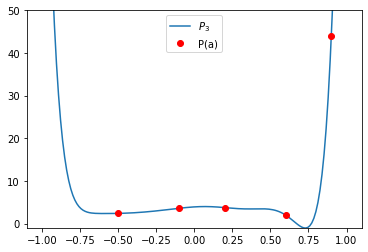

In [21]:
plt.plot(x,P3,label=r'$P_3$')
plt.plot(A,Pii[0],'ro',label="P(a)")
plt.ylim([-1,50])
plt.legend();

Добијени код можемо да применимо сада на произвољан вектор $ar,$ добијен неким насумичним избором вредности. Резултате ћемо проверавати графички.

In [22]:
import numpy.random as rndm

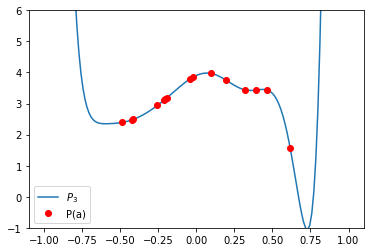

In [23]:
ar=rndm.uniform(-1/2,2/3,15)
mr=ar.size
Pr=np.outer(Fk[2],np.ones(mr))
Axkr=np.outer(ar,np.ones(n+1))-xk
Axkr=Axkr.T
for i in range(n):
    Pr[:n-i]=((Axkr[i+1:]*Pr[:n-i]-Axkr[:n-i]*Pr[1:n-i+1]).T/(xk[:n-i]-xk[i+1:])).T
plt.plot(x,P3,label=r'$P_3$')
plt.plot(ar,Pr[0],'ro',label="P(a)")
plt.ylim([-1,6])
plt.legend();    